# ■ 4장 전체코드 디버깅하며 이해하기

## 1. 2층 신경망 클래스를 만듭니다.

### 0. 필요한 패키지를 불러옵니다.

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

### 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.

In [5]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
print(network.params['W1'].shape)
print(network.params['b1'].shape)
print(network.params['W2'].shape)
print(network.params['b2'].shape)

신경망이 생성되었습니다
dict_keys(['W1', 'b1', 'W2', 'b2'])
(784, 50)
(50,)
(50, 10)
(10,)


### 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수

In [6]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')
        
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
                               # dict_keys(['W1', 'b1', 'W2', 'b2'])
#print(network.params['W1'].shape)  # (784, 50)
#print(network.params['W2'].shape)  # (50, 10)
#print(network.params['b1'].shape)  # (50,)
#print(network.params['b2'].shape)  # (10,)

## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.predict(x_train).shape

신경망이 생성되었습니다


(60000, 10)

### 3. 오차(에러) 를 출력하는 함수

In [7]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
                               # dict_keys(['W1', 'b1', 'W2', 'b2'])
#print(network.params['W1'].shape)  # (784, 50)
#print(network.params['W2'].shape)  # (50, 10)
#print(network.params['b1'].shape)  # (50,)
#print(network.params['b2'].shape)  # (10,)

## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y
    
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.predict(x_train).shape  # (60000, 10)

## 3. 오차(에러) 를 출력하는 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)   # 오차의 평균을 출력

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.loss(x_train[100], t_train[100])

신경망이 생성되었습니다


2.3746952304669624

### 4. 정확도를 출력하는 함수

In [15]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
                               # dict_keys(['W1', 'b1', 'W2', 'b2'])
#print(network.params['W1'].shape)  # (784, 50)
#print(network.params['W2'].shape)  # (50, 10)
#print(network.params['b1'].shape)  # (50,)
#print(network.params['b2'].shape)  # (10,)

## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.predict(x_train).shape  # (60000, 10)

## 3. 오차(에러) 를 출력하는 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)   # 오차의 평균을 출력
    
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.loss(x_train[100], t_train[100])   # 2.2956634380340786


## 4. 정확도를 출력하는 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.accuracy(x_train[:100,], t_train[:100,]) 

신경망이 생성되었습니다


0.11

### 5. 편미분해서 기울기를 출력하는 함수(4개의 기울기를 출력, W1, b1, W2, b2)

In [16]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
                               # dict_keys(['W1', 'b1', 'W2', 'b2'])
#print(network.params['W1'].shape)  # (784, 50)
#print(network.params['W2'].shape)  # (50, 10)
#print(network.params['b1'].shape)  # (50,)
#print(network.params['b2'].shape)  # (10,)

## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.predict(x_train).shape  # (60000, 10)

## 3. 오차(에러) 를 출력하는 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)   # 오차의 평균을 출력
    
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.loss(x_train[100], t_train[100])   # 2.298509143391436


## 4. 정확도를 출력하는 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.accuracy(x_train[:100,], t_train[:100,])   # 0.06

## 5. 편미분해서 기울기를 출력하는 함수(4개의 기울기를 출력, W1, b1, W2, b2)
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.numerical_gradient(x_train[:100,], t_train[:100,])

신경망이 생성되었습니다


{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 9.20525745e-05, -3.91378774e-05,  2.08260935e-04,  2.08467121e-04,
         1.89224554e-04, -2.13480500e-05, -1.23029924e-04, -3.53145513e-06,
        -1.24021806e-04,  2.58713628e-05,  8.86831875e-05, -1.41629433e-04,
         3.86928134e-05, -2.14805134e-04, -3.01998841e-04, -2.99614378e-05,
        -6.78501899e-05, -1.31373701e-04, -8.91002827e-07, -1.19435140e-04,
        -4.60799243e-05,  8.91014551e-05, -6.41049214e-05,  2.42195886e-04,
        -1.06015539e-04, -7.59590368e-05,  5.15620702e-05, -1.12656506e-05,
        -9.48551016e-06, -1.49661039e-05, -3.12726713e-04, -2.31749626e-04,
        -2.04366069e-04, -1.33158895e-04, -5.46299272e-05, -6.79781875e-05,
         8.49370174e-05,  1.64406710e-05,  7.16701409e-

### 6. 위의 수치미분은 너무 느려서 못쓰고 오차역전파를 써서 가중치를 구해줘야 합니다.

In [25]:
class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print(network.params.keys())  # 가중치 행렬을 가지고 있는 params 딕셔너리의 키 값들 확인
                               # dict_keys(['W1', 'b1', 'W2', 'b2'])
#print(network.params['W1'].shape)  # (784, 50)
#print(network.params['W2'].shape)  # (50, 10)
#print(network.params['b1'].shape)  # (50,)
#print(network.params['b2'].shape)  # (10,)

## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.predict(x_train).shape  # (60000, 10)

## 3. 오차(에러) 를 출력하는 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)   # 오차의 평균을 출력
    
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.loss(x_train[100], t_train[100])   # 2.298509143391436


## 4. 정확도를 출력하는 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.accuracy(x_train[:100,], t_train[:100,])   # 0.06

## 5. 편미분해서 기울기를 출력하는 함수(4개의 기울기를 출력, W1, b1, W2, b2)
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.numerical_gradient(x_train[:100,], t_train[:100,])

## 6. 위의 수치미분은 너무 느려서 못쓰고 5장에 배울 오차역전파를 써서 가중치를 구해줘야 합니다.
## 지금 아래의 gradient 함수는 5장에서 배울 오차역전파 함수 입니다. 학습이 훨씬 빠릅니다.
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.gradient(x_train[:100,], t_train[:100,])

신경망이 생성되었습니다


{'W2': array([[-2.26314243e-02, -2.01180584e-02,  2.00485577e-02,
         -5.78204838e-03, -1.16740907e-03,  2.80987066e-02,
         -7.39751592e-03,  2.83902603e-03,  1.07018240e-02,
         -4.59165820e-03],
        [-2.57605295e-02, -1.91532057e-02,  2.11914109e-02,
         -5.09386617e-03, -3.94481905e-04,  2.87043854e-02,
         -6.55216153e-03,  1.97842779e-03,  1.10842740e-02,
         -6.00425321e-03],
        [-1.86532432e-02, -2.00244182e-02,  1.85169615e-02,
         -2.79358568e-03, -3.70552767e-03,  2.63387067e-02,
         -5.63494781e-03,  1.57896437e-03,  1.04275732e-02,
         -6.05048333e-03],
        [-1.98973628e-02, -2.04122187e-02,  1.87762406e-02,
         -7.46308573e-03, -2.56847980e-03,  2.59918511e-02,
         -4.75338561e-03,  3.80740134e-03,  1.15963558e-02,
         -5.07731634e-03],
        [-2.21153497e-02, -1.77416417e-02,  1.96456966e-02,
         -4.76374485e-03, -1.78905973e-03,  2.76433606e-02,
         -8.41078482e-03,  2.22860186e-03,  1.

## 2. 2층 신경망 클래스를 가지고 학습시키는 코드

신경망이 생성되었습니다
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7796, 0.7845
train acc, test acc | 0.8755833333333334, 0.8777
train acc, test acc | 0.89885, 0.9013
train acc, test acc | 0.90845, 0.9114
train acc, test acc | 0.9144333333333333, 0.9161
train acc, test acc | 0.9192833333333333, 0.921
train acc, test acc | 0.9246666666666666, 0.9271
train acc, test acc | 0.9271833333333334, 0.9284
train acc, test acc | 0.9304166666666667, 0.9315


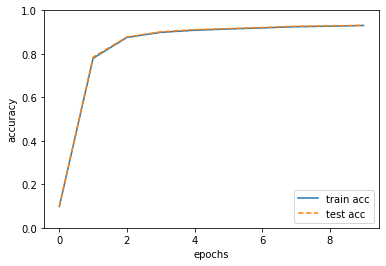

In [27]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 6000  # 반복 횟수를 적절히 설정한다. 10에폭 돌게 설정 (60000/6000 = 10 에폭)
train_size = x_train.shape[0]  # x_train.shape : (60000, 784)
batch_size = 100   # 미니배치 크기 (60000/100 = 600 회가 1 에폭)
learning_rate = 0.1  # 학습률

train_loss_list = []  # 오차를 담을 리스트(시각화를 위해서 데이터를 저장)
train_acc_list = []   # 훈련 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)
test_acc_list = []    # 테스트 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)  # 60000 / 100 = 600
# 1 에폭당 정확도를 시각화 하기위해 필요한 코드

for i in range(iters_num):   # 6000
    # 미니배치 획득                #60000      100    
    batch_mask = np.random.choice(train_size, batch_size)  # 0~60000 미만 숫자에서 100개의 숫자를 랜덤추출
    x_batch = x_train[batch_mask]  # 훈련 데이터 100개
    t_batch = t_train[batch_mask]  # 훈련 데이터 라벨 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 기울기 100개를 구한다
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):   # 가중치와 바이어스를 갱신
        network.params[key] -= learning_rate * grad[key]
    
    # 시각화
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)  
    train_loss_list.append(loss)  # 오차를 담는
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:  # 1에폭돌때 아래의 코드를 실행해라 (% : 나눗셈 나머지 계산)
        train_acc = network.accuracy(x_train, t_train)  # 훈련 데이터 정확도 출력 ?개
        test_acc = network.accuracy(x_test, t_test)     # 테스트 데이터 정확도 출력 ?개
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 문제87. TwoLayerNet 클래스를 객체와 시켜서 numerical_gradient 함수를 실행해서 기울기를 출력하시오 ! (입력데이터를 100개만 입력하시오)

In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

class TwoLayerNet:
## 1. 가중치 행렬 W1, W2, b1, b2 를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')


## 2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 편향 불러오는 코드
    
        a1 = np.dot(x, W1) + b1   # 1층 구성
        z1 = sigmoid(a1)          # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2  # 2층 구성
        y = softmax(a2)           # 2층이 출력층이라 소프트맥스 함수
        
        return y

## 3. 오차(에러) 를 출력하는 함수
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)   # 오차의 평균을 출력

# 4. 정확도를 출력하는 함수
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

# 5. 편미분해서 기울기를 출력하는 함수(4개의 기울기를 출력, W1, b1, W2, b2)
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.numerical_gradient(x_train[:100,], t_train[:100,])

신경망이 생성되었습니다


{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 1.02375506e-04,  1.09414586e-04,  1.69640055e-04, -1.46569246e-04,
         5.44403986e-04, -2.49730010e-04, -2.49143002e-04, -2.23913039e-04,
        -4.02555889e-04, -3.29840333e-04,  2.81356776e-04, -4.22388990e-05,
        -2.00224861e-04, -3.68015556e-04,  9.69477609e-06, -8.15738699e-05,
         3.40890811e-04, -2.33091013e-05, -9.31482513e-05, -3.12380077e-05,
         3.67968733e-04,  1.41252263e-04,  2.92268854e-05,  6.27679397e-05,
         1.31564071e-05,  1.68727543e-04,  1.37655283e-04,  2.64519553e-04,
        -4.39202541e-05, -1.09129172e-04, -1.28873698e-04,  1.72998438e-05,
        -4.14648094e-05,  2.36368436e-05,  4.29116997e-04, -4.69372585e-05,
        -1.78094837e-04,  1.73331618e-04,  1.00046103e-

## 문제88. 10에폭이 아니라 20에폭 돌게 코드를 수정하시오

신경망이 생성되었습니다
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7866666666666666, 0.7867
train acc, test acc | 0.8762, 0.8803
train acc, test acc | 0.8989833333333334, 0.9025
train acc, test acc | 0.9073, 0.9093
train acc, test acc | 0.91395, 0.9161
train acc, test acc | 0.9192666666666667, 0.9215
train acc, test acc | 0.9238333333333333, 0.9252
train acc, test acc | 0.9274333333333333, 0.929
train acc, test acc | 0.9303666666666667, 0.9317
train acc, test acc | 0.9337666666666666, 0.933
train acc, test acc | 0.93745, 0.9367
train acc, test acc | 0.9383333333333334, 0.9375
train acc, test acc | 0.9415166666666667, 0.9405
train acc, test acc | 0.94335, 0.9439
train acc, test acc | 0.94535, 0.9458
train acc, test acc | 0.9474666666666667, 0.9457
train acc, test acc | 0.9496166666666667, 0.9474
train acc, test acc | 0.9508666666666666, 0.9483
train acc, test acc | 0.9519666666666666, 0.9498


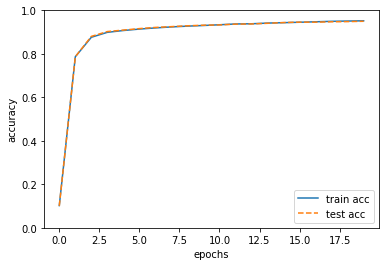

In [28]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 6000 * 2 # 반복 횟수를 적절히 설정한다. 10에폭 돌게 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1  # 학습률

train_loss_list = []  # 오차를 담을 리스트(시각화를 위해서 데이터를 저장)
train_acc_list = []  # 훈련 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)
test_acc_list = []  # 테스트 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)  # 60000 / 100 = 600
# 1 에폭당 정확도를 시각화 하기위해 필요한 코드

for i in range(iters_num):   # 60000
    # 미니배치 획득                #60000      100    
    batch_mask = np.random.choice(train_size, batch_size)  # 0~60000 미만 숫자에서 100개의 숫자를 랜덤추출
    x_batch = x_train[batch_mask]  # 훈련 데이터 100개
    t_batch = t_train[batch_mask]  # 훈련 데이터 라벨 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 기울기 100개를 구한다
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):   # 가중치와 바이어스를 갱신
        network.params[key] -= learning_rate * grad[key]
    
    # 시각화
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)  
    train_loss_list.append(loss)  # 오차를 담는
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:  # 1에폭돌때 아래의 코드를 실행해라
        train_acc = network.accuracy(x_train, t_train)  # 훈련 데이터 정확도 출력 ?개
        test_acc = network.accuracy(x_test, t_test)     # 테스트 데이터 정확도 출력 ?개
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 문제89. 4장에서 만든 2층 신경망의 가중치와 바이어스를 pickle 파일로 내리시오

신경망이 생성되었습니다
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7923, 0.7991
train acc, test acc | 0.8775333333333334, 0.8821
train acc, test acc | 0.8977, 0.9006
train acc, test acc | 0.9074833333333333, 0.9108
train acc, test acc | 0.9146, 0.9172
train acc, test acc | 0.9185166666666666, 0.9199
train acc, test acc | 0.9234166666666667, 0.9244
train acc, test acc | 0.92725, 0.928
train acc, test acc | 0.9303, 0.932


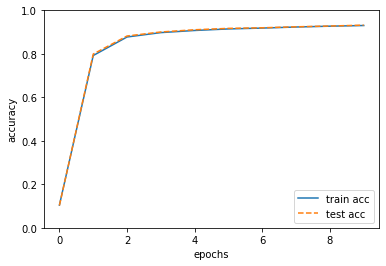

In [30]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 6000  # 반복 횟수를 적절히 설정한다. 10에폭 돌게 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1  # 학습률

train_loss_list = []  # 오차를 담을 리스트(시각화를 위해서 데이터를 저장)
train_acc_list = []  # 훈련 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)
test_acc_list = []  # 테스트 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)  # 60000 / 100 = 600
# 1 에폭당 정확도를 시각화 하기위해 필요한 코드

for i in range(iters_num):   # 60000
    # 미니배치 획득                #60000      100    
    batch_mask = np.random.choice(train_size, batch_size)  # 0~60000 미만 숫자에서 100개의 숫자를 랜덤추출
    x_batch = x_train[batch_mask]  # 훈련 데이터 100개
    t_batch = t_train[batch_mask]  # 훈련 데이터 라벨 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 기울기 100개를 구한다
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):   # 가중치와 바이어스를 갱신
        network.params[key] -= learning_rate * grad[key]
    
    # 시각화
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)  
    train_loss_list.append(loss)  # 오차를 담는
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:  # 1에폭돌때 아래의 코드를 실행해라
        train_acc = network.accuracy(x_train, t_train)  # 훈련 데이터 정확도 출력 ?개
        test_acc = network.accuracy(x_test, t_test)     # 테스트 데이터 정확도 출력 ?개
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle
with open('C:\\data\\jupyter\\deep_learning\\2021.03.11\\mnist_weight.pkl', 'wb') as f:
    pickle.dump(network.params, f)

## 문제90. 3장에서 사용한 3층 신경망 코드를 2층 신경망으로 변경하고 위의 pickle 파일을 셋팅해서 필기체를 분류할 수 있는 신경망을 만드시오

In [32]:
import numpy as np
from common.functions import *
from  dataset.mnist  import  load_mnist 
import pickle

def init_network():
    with  open("C:\\data\\jupyter\\deep_learning\\2021.03.11\\mnist_weight.pkl", "rb")  as  f:
        network = pickle.load(f)
    return  network 

# 1. 데이터를 불러옵니다. 
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False) 

# 2. 가중치와 바이어스 값을 불러옵니다.
network = init_network()
w1, w2 = network['W1'], network['W2']
b1, b2 = network['b1'], network['b2']

# 3. 신경망을 구성합니다. 
# 0층
x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = softmax(z)
a = np.argmax(z_hat, axis=1)     # axis =1 이 축  # 예측값
b = t_train[0:100]   # 실제 정답 

print('총 ',len(a), '중에서 ', sum(a==b),'개 맞추었습니다')

총  100 중에서  97 개 맞추었습니다
